In [ ]:
import torch
print(torch.cuda.is_available())

False


In [ ]:
from fastai.vision.all import cnn_learner, vision_learner, Path, ImageDataLoaders, aug_transforms, Resize




In [ ]:
# Define the path to your dataset
path = Path('flowers')

In [ ]:
type(path)

pathlib.PosixPath

In [ ]:
# python generators
# dont use this code - generators python

In [ ]:
# Load the data
dls = ImageDataLoaders.from_folder(path,
                                   valid_pct=0.2,

                                   item_tfms=Resize(224),
                                   batch_tfms=aug_transforms())


TypeError: 'NoneType' object is not iterable

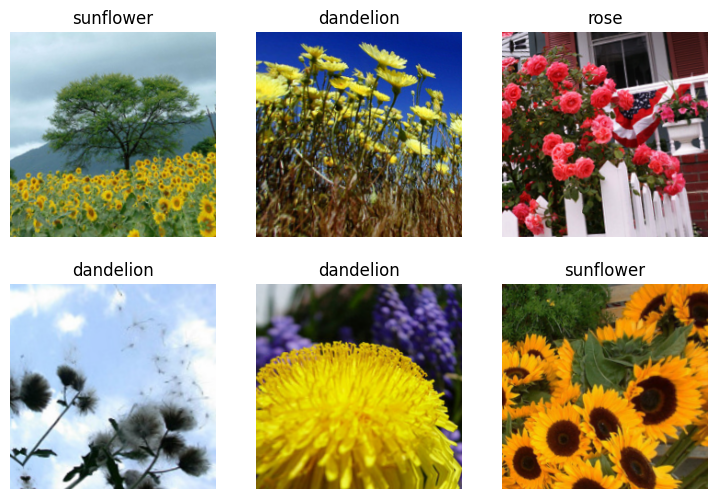

In [ ]:
# Check your data (optional but you should try to always do it!)
dls.show_batch(max_n=6)

In [ ]:
# Choose a base architecture for transfer learning
learn = cnn_learner(dls, resnet34, metrics=error_rate)

NameError: name 'dls' is not defined

SuggestedLRs(valley=0.0010000000474974513)

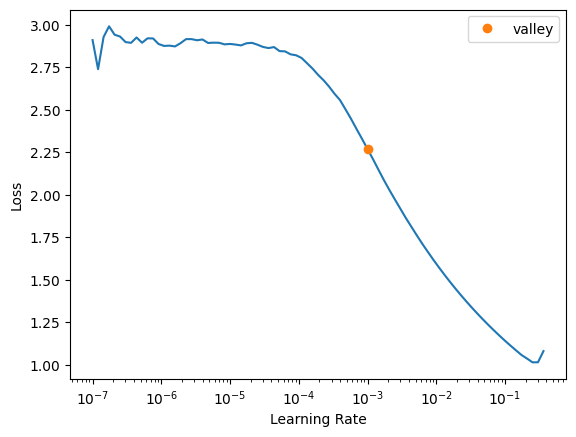

In [ ]:
# Find an appropriate learning rate
learn.lr_find()

In [ ]:
suggested_lr = 0.001

In [ ]:
# Train the model
learn.fine_tune(epochs=4, base_lr=suggested_lr)

epoch,train_loss,valid_loss,error_rate,time
0,3.077139,4.462063,0.833333,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.450821,3.528161,0.833333,00:01
1,2.558196,2.700725,0.833333,00:01
2,2.436209,2.055027,0.777778,00:01
3,2.268631,1.698492,0.555556,00:01


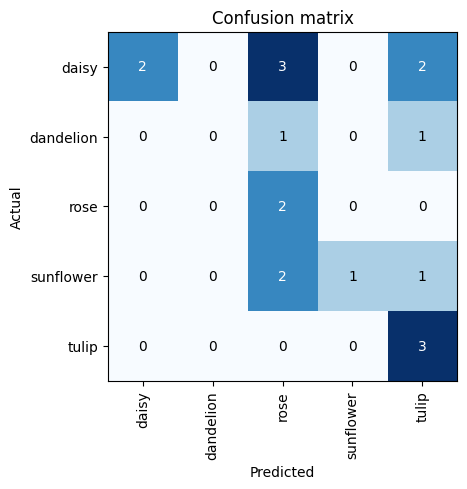

In [ ]:
# Interpret the results (optional but again, you should always try to do it!)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# Export the model
learn.export('flower_classifier.pkl')


In [ ]:
# For later use, you can load the trained model with:
# learn_inf = load_learner('flower_classifier.pkl')

Prediction: tulip; Probability: 0.4998


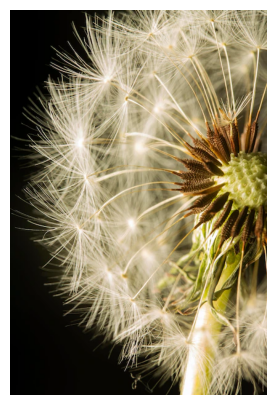

In [ ]:
from fastai.vision.all import *

# Load the learner
learn = load_learner('flowers/flower_classifier.pkl')

# Path to your image
image_path = Path('d.jpg')

# Load the image file
img = PILImage.create(image_path)

# Make a prediction
pred,pred_idx,probs = learn.predict(img)

# Show the image and its prediction
img.show()
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")


In [ ]:
pred_idx

tensor(4)